In [1]:
# As per usual. Make sure all dependencies are installed. Look at their respective documentation
import re
import pandas as pd
import numpy as np
from numpy import array, asarray, zeros
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
# Download stopwords or ignore them if already downloaded
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Frane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Read the data file
df = pd.read_csv("Sentiment140.tenPercent.sample.tweets.tsv", sep="\t")
df.head()

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


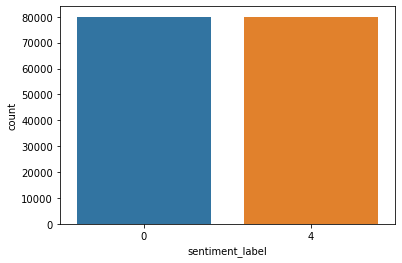

In [5]:
# Plot target values to see distribution
sns.countplot(x="sentiment_label", data=df)
plt.show()

In [6]:
# Function to remove mentions
def rmv_mention(tweet):
    return re.sub(r"@\w+", " ", tweet)

# Function to remove URLs
def rmv_url(tweet):
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "", tweet)

stopwords = nltk.corpus.stopwords.words('english')
def rmv_stopword(tweet):
    tweet = tweet.split(" ")
    for w in list(tweet):
        if w in stopwords:
            tweet.remove(w)
    return " ".join(tweet)

# Function to remove special characters excluding spaces
def rmv_special(tweet):
    return re.sub(r"\W+|_", " ", tweet)

In [7]:
# Function for processing/cleaning a tweet
def process_tweet(tweet):
    tweet = rmv_mention(tweet)
    tweet = rmv_url(tweet)
    tweet = rmv_special(tweet)
    tweet = tweet.lower()
    tweet = rmv_stopword(tweet)
    return tweet

In [8]:
# Create list of tweets
corpus = []
for w in df["tweet_text"]:
    corpus.append(process_tweet(w))

In [9]:
# Create sentiment list with 0, 1 values rather than 0, 4
y = df["sentiment_label"]
y = np.array(list(map(lambda x: 1 if x==4 else 0, y)))

In [10]:
# Print sample of cleaning
print(corpus[1])
print(y[1])

ughhh layin downnnn waiting zeina cook breakfast
1


In [11]:
# Vectorize tweets
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(corpus)
print(X.shape)

(160000, 70977)


In [12]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)

(128000, 70977)


In [13]:
# Naive bayes classifier. More specifically the multinomial version
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Naive bayes prediction
y_pred = naive_bayes.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7458125


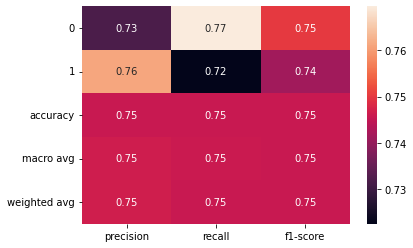

In [15]:
# Visualize classification report
cr = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)
plt.show()

In [16]:
# True/False Positive/Negative confusion matrix
cm = confusion_matrix(y_test, y_pred)

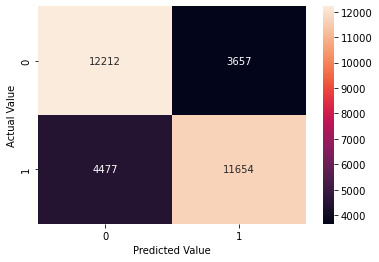

In [17]:
# Visualize the confusion matrix
labels = ["0", "1"]
ax = sns.heatmap(cm, annot=True, fmt="", xticklabels=labels, yticklabels=labels)

ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Value")
plt.show()

In [18]:
# Logistic regression classification
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [19]:
# predict and output accuracy
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.76025


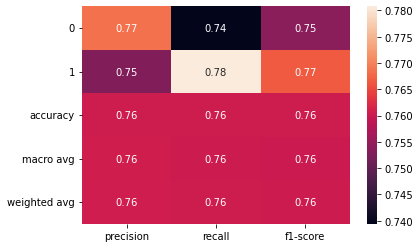

In [20]:
# Visualize classification report
cr = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)
plt.show()

In [21]:
# True/False Positive/Negative confusion matrix
cm = confusion_matrix(y_test, y_pred)

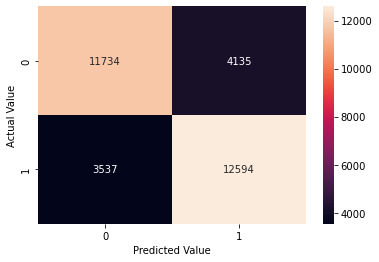

In [22]:
# Visualize the confusion matrix
labels = ["0", "1"]
ax = sns.heatmap(cm, annot=True, fmt="", xticklabels=labels, yticklabels=labels)

ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Value")
plt.show()